<a href="https://colab.research.google.com/github/YoonyoungChoi/problem_set/blob/main/COM501_Problem_Set2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Google colab adress: https://colab.research.google.com/drive/1iZ4d3Oub2BjpL435tFUI4Zi2FR8ndseQ#scrollTo=l6Wfmh_ZOxYS
# Github link: https://github.com/YoonyoungChoi/problem_set/blob/main/COM501_Problem_Set2.ipynb
# Import packages 

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Problem 1** The Simpson quadrature rule approximates a definite intergral as follows:
$I= \int_a^bf(x)dx \approx \frac{b-a}{6}[f(a)+4f(\frac{a+b}{2}+f(b))]=\hat{I}^S$\
1) Suppose the function $f$ satisfies all necessaries mathematical conditions, and the inverval $[a,b]$ is split up into $N$ subintervals with width $\delta =\frac{b-a}{N}$. The integral $I$ is the approximated as the sum of the Simpson approximations in each subinterval. Show that the error of the new approximation has order $O(N^{-4}$)\
2) You are given to implement a set of computer code that computes the Simpson rule for matching ReLU(6), based on $N$ subintervals where $N \in [0,100]$\
3) Roughly speaking, what is the rate of convergence of the absolute error of your Simpsons quadrature approximation? In other words, give a rough estimate of the value of $r$ such that $\left| \hat{I}^S_{N}-I \right| = O(N^{-r})$\
where $\hat{I}^S$ is the Simpson quadrature approximation based on $N$ subintervals

<function matplotlib.pyplot.show>

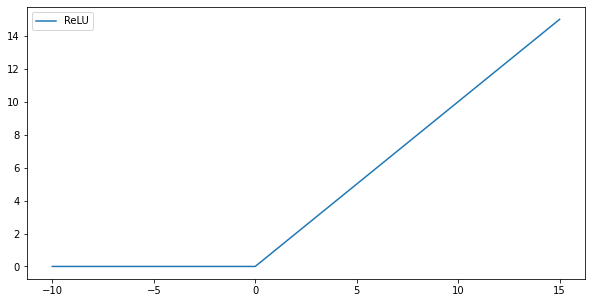

In [ ]:
#Basic ReLU
x=np.linspace(-10, 15, 1000)
y=np.maximum(0,x)

plt.figure(figsize=(10,5))
plt.plot(x,y)
plt.legend(['ReLU'])
plt.show


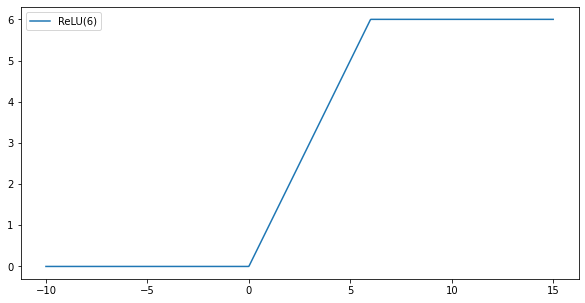

In [ ]:
#ReLU(6)
x=np.linspace(-10, 15, 1000)
y=np.minimum(np.maximum(0,x),6)
plt.figure(figsize=(10,5))
plt.plot(x,y)
plt.legend(['ReLU(6)'])
plt.show()

In [ ]:
# Define ReLU(6) function
def relu6(x):
  return min(max(0,x),6)

# Quadratue implementaion
a=0.00001
b=46

# Simpson's rule
def simpson(n):
  # Define the x and delta
  x=np.linspace(start=a, stop=b, num=2*n+1)
  delta=(b-a)/n

  # Apply ReLU(6) function
  relu=np.vectorize(relu6)(x)

  # Evaluation of the Simpson rule
  s=delta*np.sum(relu[0:-1:2]+4*relu[1::2]+relu[2::2])/6

  return np.sum(s)

n_max=100
result=[]
for i in range(1, n_max+1):
  result.append(simpson(i))

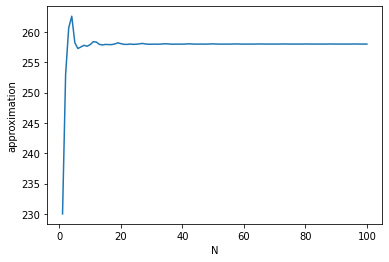

In [ ]:
plt.plot([i for i in range(1,n_max+1)],result)
plt.xlabel("N")
plt.ylabel("approximation")
plt.show()

In [ ]:
exact_value=258
err = [abs(item-exact_value)for item in result]

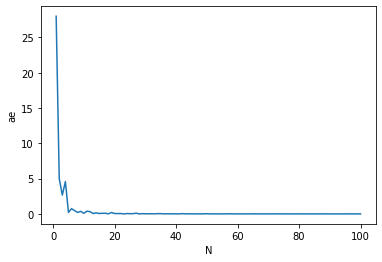

In [ ]:
plt.plot([i for i in range(1, n_max+1)],err)
plt.xlabel("N")
plt.ylabel("ae")
plt.show()

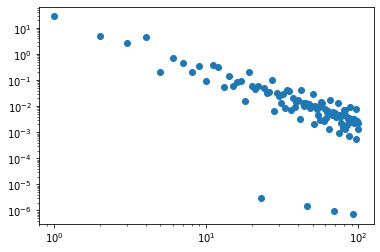

In [ ]:
fig=plt.figure()
ax=plt.gca()
ax.scatter(range(1,len(result)+1),err)
plt.xscale("log")
plt.yscale("log")
plt.show()

**Problem 2** Consider the following $M-$dimensional integral $I^M=\int_a^b \dots \int_a^b f(x_1, \dots, x_M)dx_1 \dots dx_M$\
We can compute an approximation of $I^M$ using the left-point quadrature rule for each inner intergral. In this sense, suppose that we divide up the integral $[a,b]$ into $N$ subintervals, and set $\Delta = \frac{b-a}{N}$. Define the $N-$dimensional left-point quadrature approximation as $\hat{I^N_{M}}=\sum\limits_{n_1=0}^{N-1} \ldots \sum\limits_{n_1=0}^{N-1}f(a+n_1\Delta, \ldots, a+n_M\Delta)\Delta^M$\
In this question, you can refer Fubini's theorem only as a reference point. You do not need the theorem for proof.\
1) Demonstrate that the absolute error of the $M-$dimensional left-point quadrature rule is of order $O(M \times N^{-1})$\
2) Discuss the number of basic operations required to compute $I_N^M$ is of order $O(N^M)$. For simplicity, assume that one evaluation of $f(a+n_1\Delta, \ldots, a+n_M\Delta)\Delta^M$ is one basic operation. You do not have to provide formal proof.\
3) We can define the computational efficiency of the $M-$dimensional left-point quadrature as the inverse of the product between its error and the computational budget it requires. Plot the order of the computational efficiency of the $M-$dimensional left-point quadrature approximation as a function of $M$ for $M \in [1,10]$ and $N=100$\
4) Do you believe that the $M-$dimensional left-point quadrature rule is the most computationally efficient approximation of the $M-$dimensional integral $I^M$? Argue why or why not.

Computational effort\
$\hat{I_N}=\sum \limits_{n=0}^{N-1} \Delta f(a+n\Delta)$
1. Compute $a+n\Delta$ for $n=0, \cdots, N-1$
2. Evaluate $f(a+n\Delta)$ for $n=0, \cdots, N-1$
3. Multiply $\Delta$ with $f(a+n\Delta)$ over $n=0, \cdots, N-1$
4. Sum up $f(a+n\Delta)$ over $n=0, \cdots, N-1$\
Computational Effort(Left-point):\
$CE(\hat{I_N})=O(N)$\
MSE:\
$MSE(\hat{I_N})=VAR(\hat{I_N})+Bias^2(\hat{I_N})=0+(\hat{I_N})^2=O(N^{-2})$
Computational efficiency:\
$\varepsilon(\hat{I_N})=\frac{1}{CE(\hat{I_N})\cdot MSE(\hat{I_N})}=\frac{1}{O(N) \cdot O(N^{-2})}=O(N)$\
Multidimensional quadrature\
$\varepsilon(\hat{I_N}^M)=\frac{1}{CE(\hat{I_N}^M)\cdot MSE(\hat{I_N}^M)}=\frac{1}{O(N^M) \cdot O(M^2 N^{-2})}=O(M^{-2}N^{2-M})$



In [ ]:
import numpy as np
import time
from itertools import repeat, product

def func2(x):
  return np.sum(x)

def M_integrate2(a, b, M, n=100):
  delta = (b-a)/n
  pair = list(range(n))
  pair = list(repeat(pair, M))
  pair = list(product(*pair))

  result = 0
  for i in pair:
    x = list(np.zeros(M))
    for k in range(len(i)):
      x[k]= a+delta*i[k]
    result= result +func2(x)*(delta**M)
  return result

error = []
t = []
ce = []
true_value = [1.5, 9, 40.5, 162, 1215/2, 2187, 15309/2, 26244, 177147/2, 295245]

for j in range(1,11):
  abs_error = 0
  start = time.time()
  approx = M_integrate2(-1,2,j,100)
  last=time.time()
  print("time:", last-start)
  abs_error = abs(true_value[j-1]-approx)
  error.append(abs_error)
  ce.append(1/((abs_error**2)*(last-start)))

m=list(range(1,11))
plt.plot(m, ce, marker='o')
plt.xlabel('M')
plt.ylabel("computational efficiency")
plt.title("computational efficiency vs M")
plt.show()

time: 0.0011487007141113281
time: 0.10358285903930664
time: 10.8492112159729


In [ ]:
m=list(range(1,5))
plt.plot(m, ce, marker='o')
plt.xlabel('M')
plt.ylabel('computational efficiency')
plt.title('computational efficiency vs M')
plt.show()

NameError: ignored